**Introduction to Global Vector method for embedding text**


In [3]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [4]:
# download the word vectors
import gensim.downloader as api
glove_model = api.load('glove-wiki-gigaword-300')

[==================================================] 100.0% 376.1/376.1MB downloaded


In [35]:
glove_model

In [5]:
glove_model["beautiful"]

array([-2.3852e-01, -3.3704e-01, -2.6531e-01, -3.4693e-01, -1.2875e-01,
        1.0698e-01, -2.4669e-02,  2.6829e-02, -1.0024e-01, -9.1494e-01,
        4.8989e-01, -1.0362e-01, -2.4535e-01,  5.7003e-01, -3.5189e-02,
       -3.7690e-01, -6.9177e-02, -2.5942e-01,  2.2511e-01,  5.1855e-01,
       -3.9326e-01,  1.2665e+00, -4.4396e-01,  7.6827e-01, -1.0909e-02,
       -2.4237e-01, -1.0275e-01, -4.9712e-01, -8.0183e-02,  4.0611e-01,
        2.1275e-01,  6.5182e-01, -1.1487e+00,  4.6080e-03, -6.8265e-01,
        9.6941e-01, -7.6194e-02, -4.1590e-01, -2.7069e-01, -5.3364e-02,
       -7.9631e-02, -2.6670e-01, -2.1544e-02,  2.2392e-01,  5.5741e-02,
        8.4611e-02,  8.6011e-01,  4.8927e-01,  4.7428e-01, -2.4446e-01,
       -2.1553e-01,  1.4370e-01,  5.0683e-01, -5.8435e-01, -5.6243e-01,
       -6.3757e-02, -2.2861e-01, -6.9374e-02,  5.6618e-01, -8.7813e-02,
       -2.1272e-01, -1.6319e-01,  3.3545e-01,  1.3707e-01, -1.1920e-03,
        9.7461e-02,  3.2382e-01, -2.2693e-01, -1.7767e-01,  4.01

In [6]:
glove_model['ugly']

array([ 0.51359  ,  0.02538  ,  0.080338 , -0.084878 , -0.14292  ,
       -0.042213 , -0.69721  ,  0.21186  ,  0.76892  , -0.39716  ,
        0.068578 ,  0.37696  , -0.074055 ,  0.11572  ,  0.21816  ,
       -0.4058   ,  0.48244  , -0.45734  ,  0.52256  ,  0.12455  ,
       -0.029978 ,  0.42324  ,  0.13491  ,  0.2582   , -0.075682 ,
       -0.10072  ,  0.24141  , -0.92781  ,  0.40955  ,  0.15916  ,
       -0.77729  , -0.11806  , -0.51388  , -0.10838  , -0.70269  ,
        0.92374  , -0.079416 , -0.24821  , -0.21452  ,  0.42194  ,
        0.29268  , -0.36485  , -0.10676  , -0.53268  ,  0.15579  ,
        0.16625  , -0.7486   , -0.33544  ,  0.32725  ,  0.041092 ,
       -0.38007  ,  0.30422  ,  0.22262  , -0.31988  , -0.31067  ,
       -0.13173  , -0.18666  ,  0.046198 ,  0.19376  , -0.5624   ,
       -0.2282   , -0.82817  , -0.42115  , -0.4966   , -0.048112 ,
       -0.072064 ,  0.63434  , -0.16605  ,  0.12267  , -0.3164   ,
       -0.6656   , -0.064337 , -0.23182  ,  0.031037 , -0.2992

In [7]:
glove_model.most_similar("girl")

[('boy', 0.8272891044616699),
 ('woman', 0.729641854763031),
 ('girls', 0.7227292060852051),
 ('teenager', 0.6509774327278137),
 ('teenage', 0.6492719054222107),
 ('mother', 0.6417974829673767),
 ('boys', 0.6283578872680664),
 ('child', 0.6229295134544373),
 ('teen', 0.612524151802063),
 ('daughter', 0.6050207614898682)]

In [19]:
glove_model.most_similar(positive=['boy', 'queen'], negative=['girl'], topn=3)
# the famous example of relations

[('king', 0.6770139932632446),
 ('monarch', 0.5442801117897034),
 ('elizabeth', 0.5344177484512329)]

In [25]:
glove_model.most_similar(positive=[  'iran' , 'berlin'] , negative=['tehran'] , topn=2)

[('germany', 0.7082135081291199), ('german', 0.5572676062583923)]

In [27]:
glove_model.most_similar(positive = ['bad' , 'happy'], negative=['good' ] , topn=5)

[('sad', 0.5639287233352661),
 ('sorry', 0.559724748134613),
 ('unhappy', 0.5575994849205017),
 ('scared', 0.5041486024856567),
 ('glad', 0.5023762583732605)]

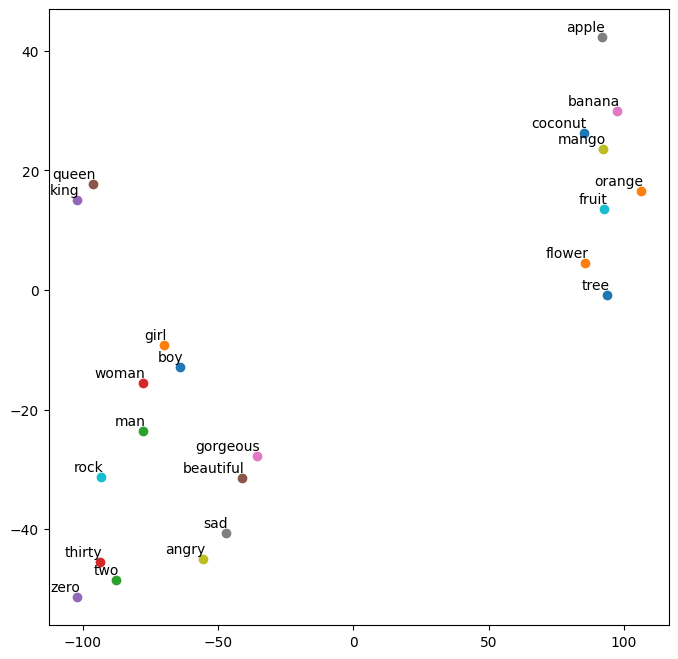

In [50]:
vocab = ["boy", "girl", "man", "woman", "king", "queen", "banana", "apple", "mango", "fruit", "coconut", "orange", "two" ,"thirty" , "zero" , "beautiful" , "gorgeous" , "sad" , "angry" , "rock" , "tree" , "flower"]

def tsne_plot(model):
    labels = []
    wordvecs = []

    for word in vocab:
        wordvecs.append(model[word])
        labels.append(word)


    wordvecs = np.array(wordvecs)

    tsne_model = TSNE(perplexity=3, n_components=2, init='pca', random_state=42)
    coordinates = tsne_model.fit_transform(wordvecs)

    x = []
    y = []
    for value in coordinates:
        x.append(value[0])
        y.append(value[1])

    plt.figure(figsize=(8,8))
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(2, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

tsne_plot(glove_model)